<a href="https://colab.research.google.com/github/hanan99/Traffick-sign-recognition/blob/main/traffic-sign-NNTamrin21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import tensorflow as tf
from random import seed, randint, choice
import pickle
import cv2
from copy import deepcopy
from sklearn.utils import shuffle
from tensorflow.keras import layers, Sequential
from sklearn.metrics import confusion_matrix
# from collections import Counter
import seaborn as sns
# from tensorflow.keras.utils import plot_model
# import matplotlib.image as mpimg
# import matplotlib.gridspec as gridspec
# from IPython.core.display import Image as image
# from PIL import Image
# %matplotlib inline

import random
import pandas as pd
import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D,AveragePooling2D, Flatten, Dense, Dropout, Activation , Concatenate, Input , BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
from tensorflow.keras import backend as K
from tensorflow.keras import activations

%matplotlib inline

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')
labels = pd.read_csv(r'/content/drive/My Drive/data1/label_names.csv', index_col=0)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
with open('/content/drive/My Drive/data1/train.pickle', 'rb') as f:
    train_data = pickle.load(f)
with open('/content/drive/My Drive/data1/valid.pickle', 'rb') as f:
    valid_data = pickle.load(f)
with open('/content/drive/My Drive/data1/test.pickle', 'rb') as f:
    test_data = pickle.load(f)

In [ ]:
print(len(train_data['features']), train_data.keys())
print(len(valid_data['features']), valid_data.keys())
print(len(test_data['features']),test_data.keys())

34799 dict_keys(['coords', 'labels', 'features', 'sizes'])
4410 dict_keys(['coords', 'labels', 'features', 'sizes'])
12630 dict_keys(['sizes', 'coords', 'features', 'labels'])


In [ ]:
labels.head(labels.shape[0])


,SignName
ClassId,
0,Speed limit (20km/h)
1,Speed limit (30km/h)
2,Speed limit (50km/h)
3,Speed limit (60km/h)
4,Speed limit (70km/h)
5,Speed limit (80km/h)
6,End of speed limit (80km/h)
7,Speed limit (100km/h)
8,Speed limit (120km/h)


In [ ]:
index_label = pd.Series(labels.SignName.values,index=labels.index).to_dict()
label_index = dict(map(reversed, index_label.items()))
del labels

In [ ]:
label_index = [[] for _ in range(len(index_label))]
for i in range(len(train_data['labels'])):
    label_index[train_data['labels'][i]].append(i)

In [ ]:
trainX, trainY = deepcopy(train_data['features']), deepcopy(train_data['labels'])
validX, validY = deepcopy(valid_data['features']), deepcopy(valid_data['labels'])
testX, testY = deepcopy(test_data['features']), deepcopy(test_data['labels'])

In [ ]:
# summarize loaded dataset
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)
print(validX.shape, validY.shape)


(34799, 32, 32, 3) (34799,)
(12630, 32, 32, 3) (12630,)
(4410, 32, 32, 3) (4410,)


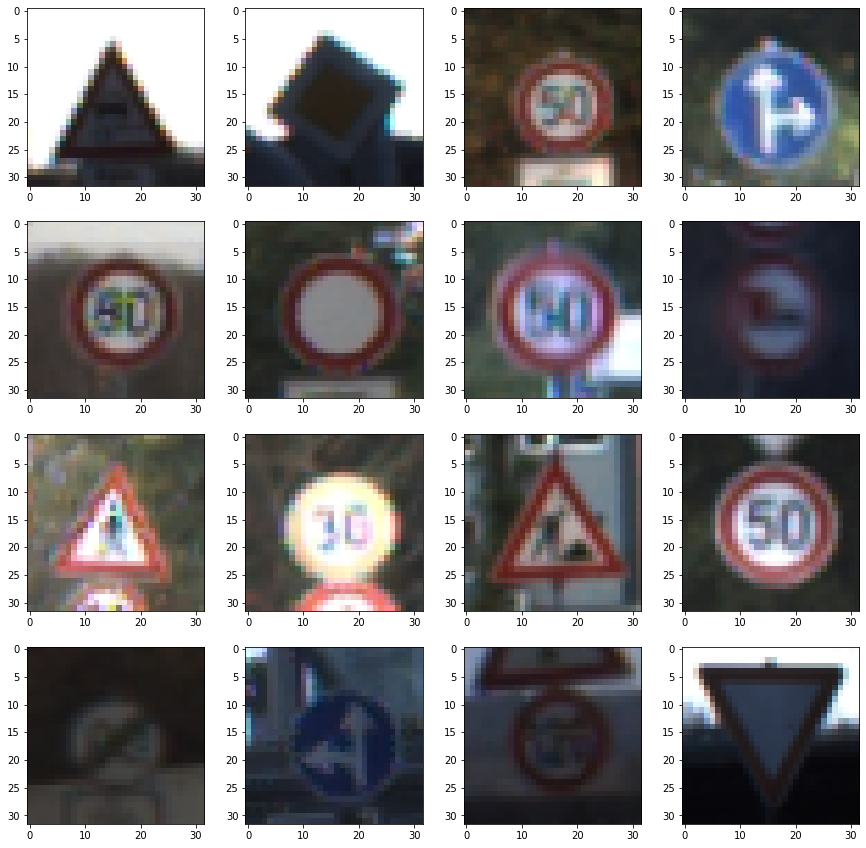

In [ ]:
seed(10)

fig, axarr = plt.subplots(4,4, figsize = (15, 15))
for i in range(4):
    for j in range(4):
        num = randint(0,len(train_data['features']))
        axarr[i][j].imshow(train_data['features'][num])

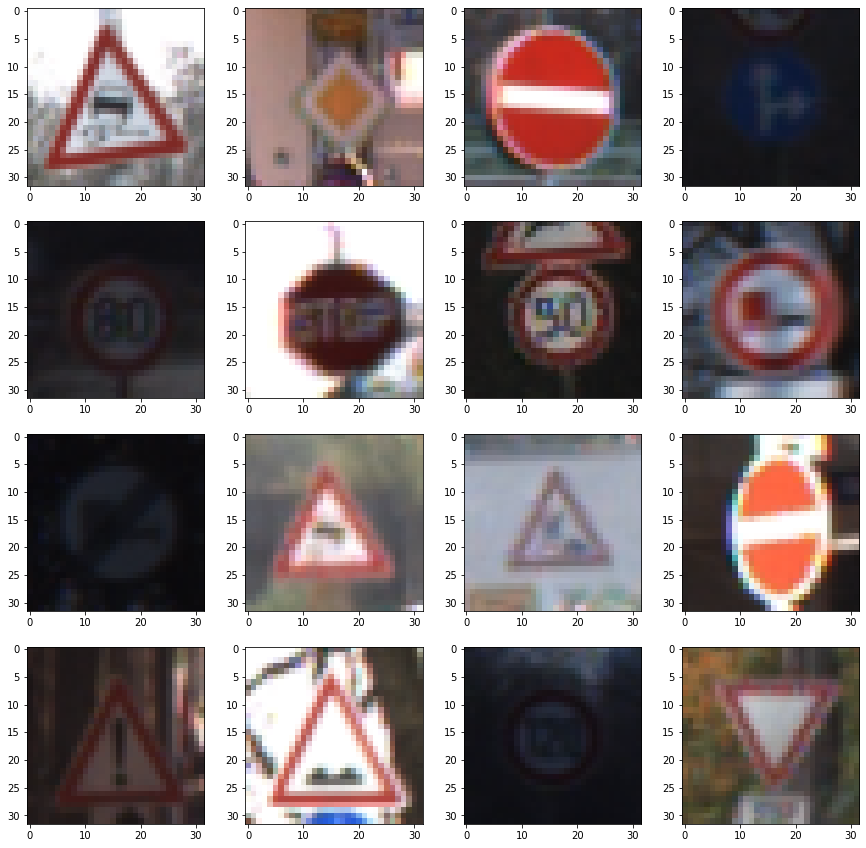

In [ ]:
seed(10)

fig, axarr = plt.subplots(4,4, figsize = (15, 15))
for i in range(4):
    for j in range(4):
        num = randint(0,len(valid_data['features']))
        axarr[i][j].imshow(valid_data['features'][num])

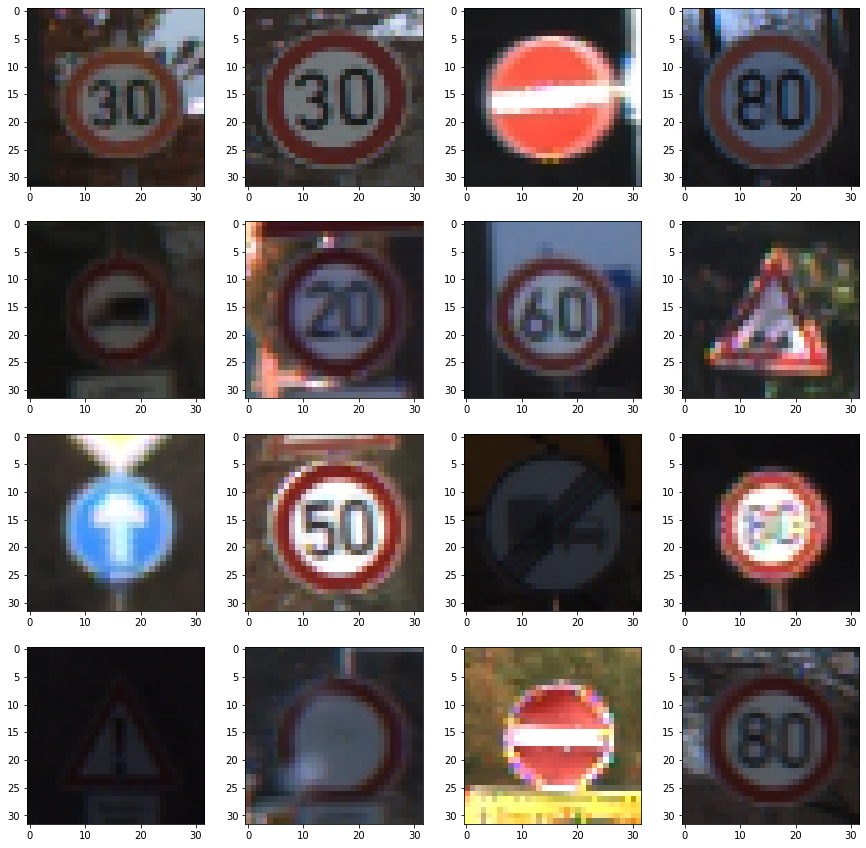

In [ ]:
seed(10)

fig, axarr = plt.subplots(4,4, figsize = (15, 15))
for i in range(4):
    for j in range(4):
        num = randint(0,len(test_data['features']))
        axarr[i][j].imshow(test_data['features'][num])

11


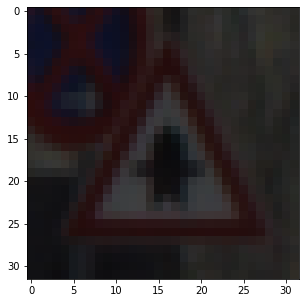

In [ ]:
index = random.randint(0, len(trainX))
image = trainX[index].squeeze()

plt.figure(figsize=(5, 5))
plt.imshow(image)
print(trainY[index])

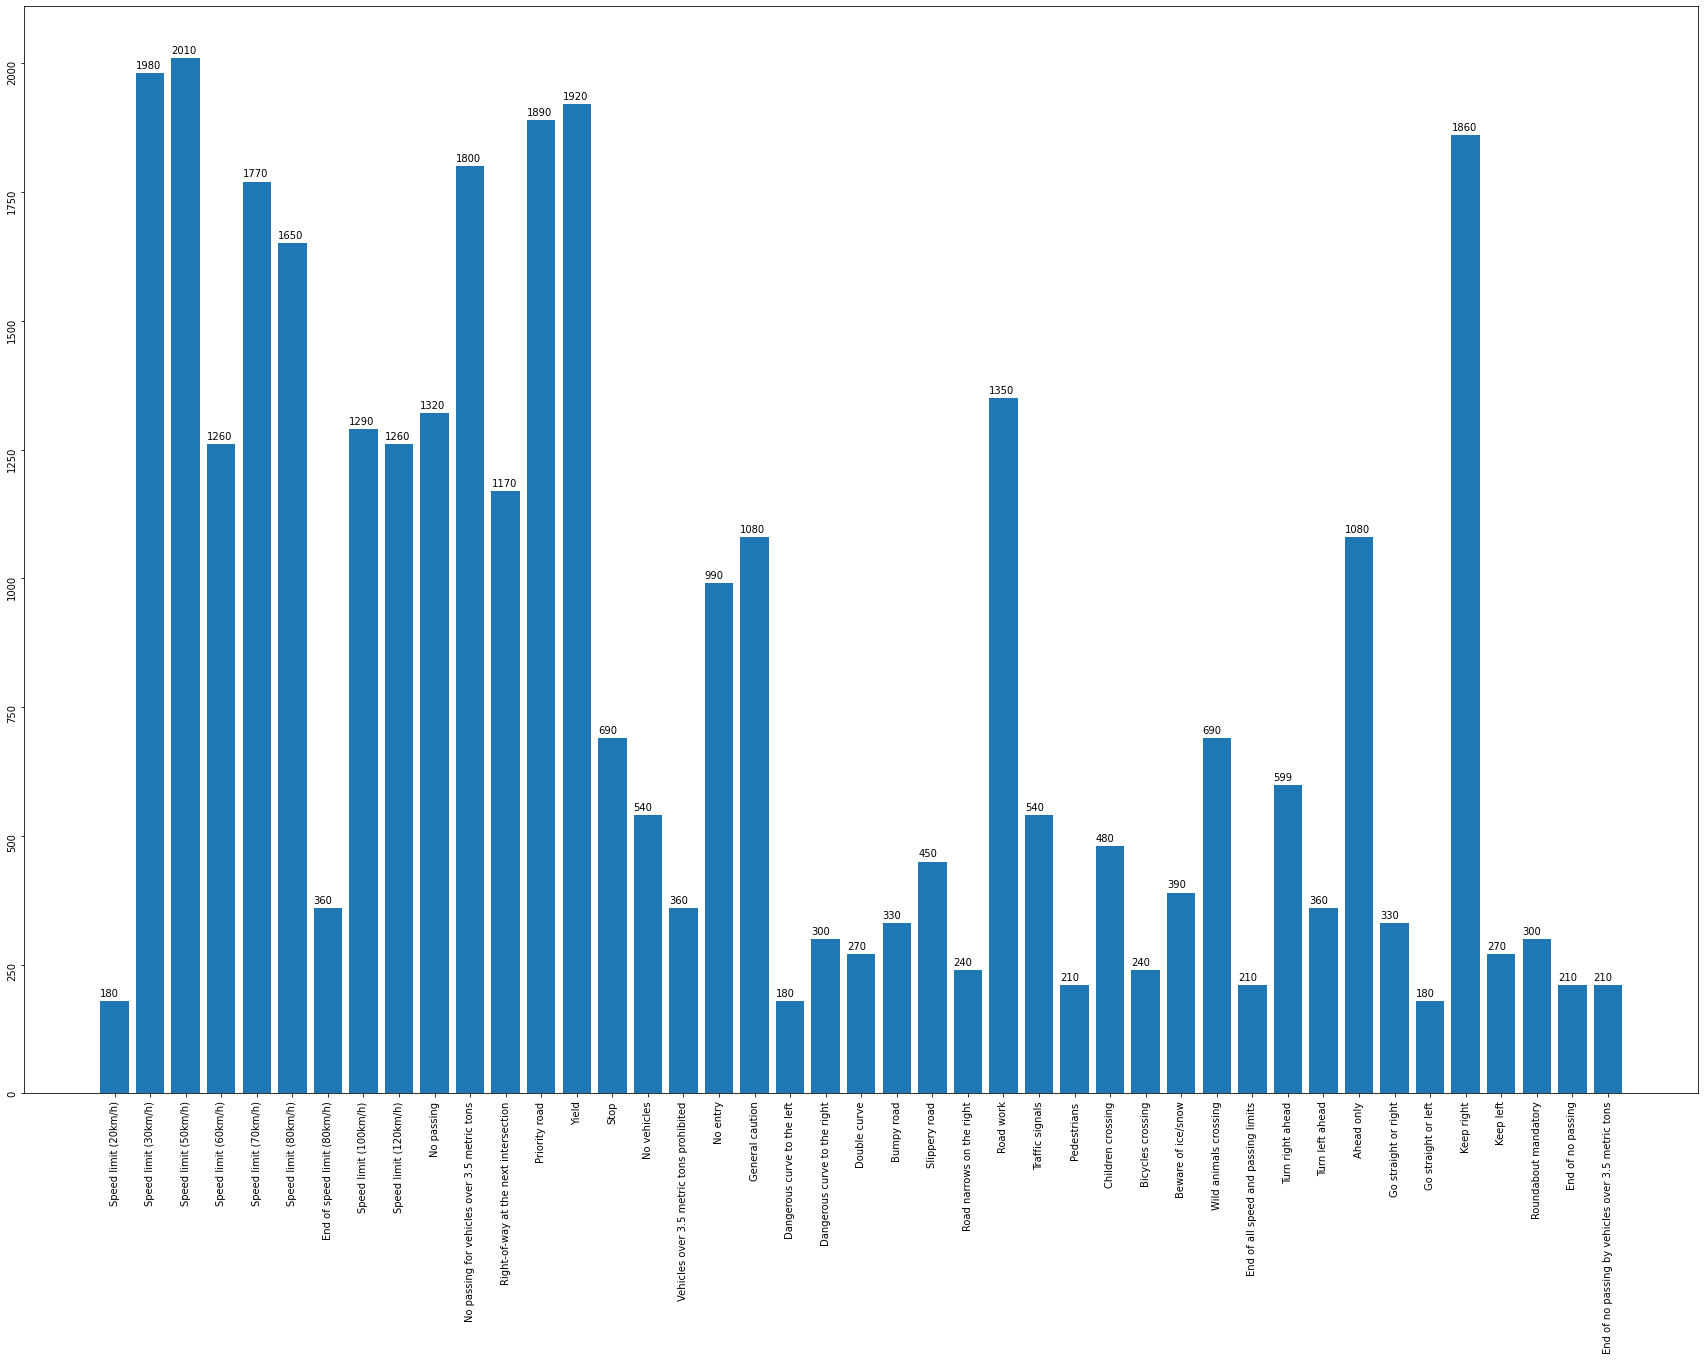

In [ ]:
(unique, counts) = np.unique(train_data['labels'], return_counts=True)
fig, image = plt.subplots(figsize = (30,20))
image.bar([index_label[x] for x in unique], counts)
image.tick_params(rotation = 90)
for i in image.patches:
    image.text(i.get_x(), i.get_height() + 10, str(i.get_height()))

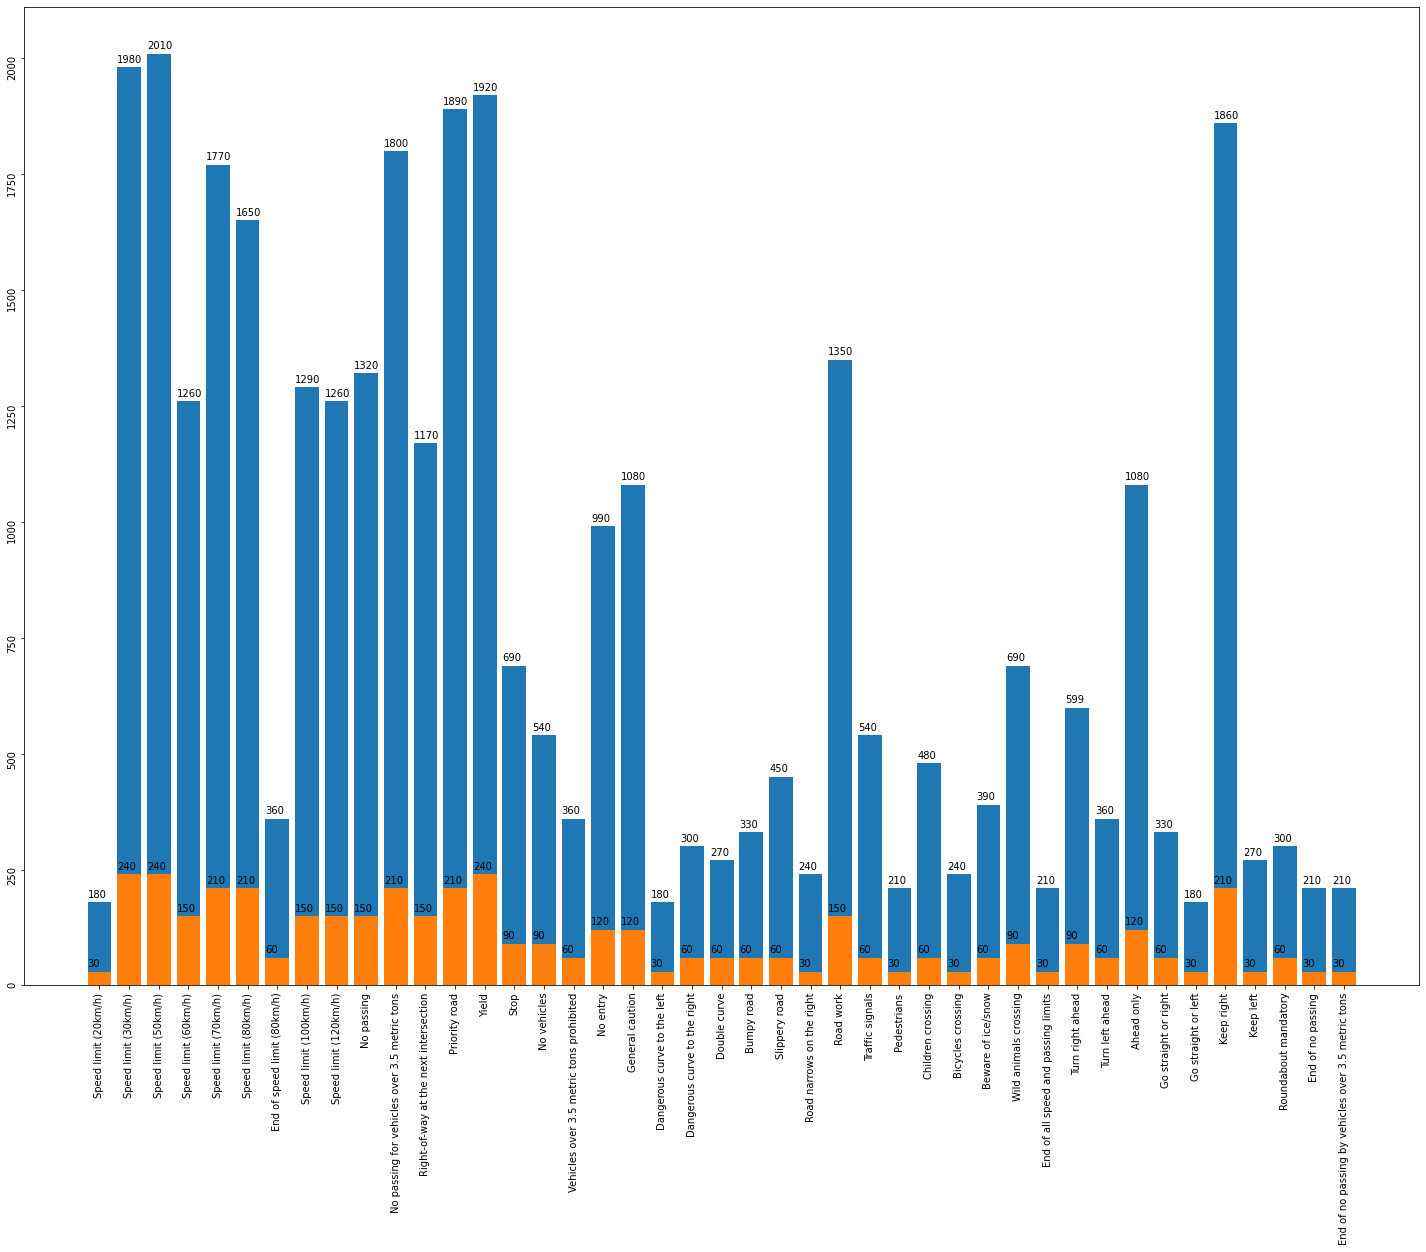

In [ ]:
(unq_valid, cnt_valid) = np.unique(valid_data['labels'], return_counts=True)

fig, image = plt.subplots(figsize = (25, 18))
image.bar([index_label[x] for x in unique], counts)
image.bar([index_label[x] for x in unq_valid], cnt_valid)
image.tick_params(rotation = 90)
for i in image.patches:
    image.text(i.get_x(), i.get_height() + 10, str(i.get_height()))

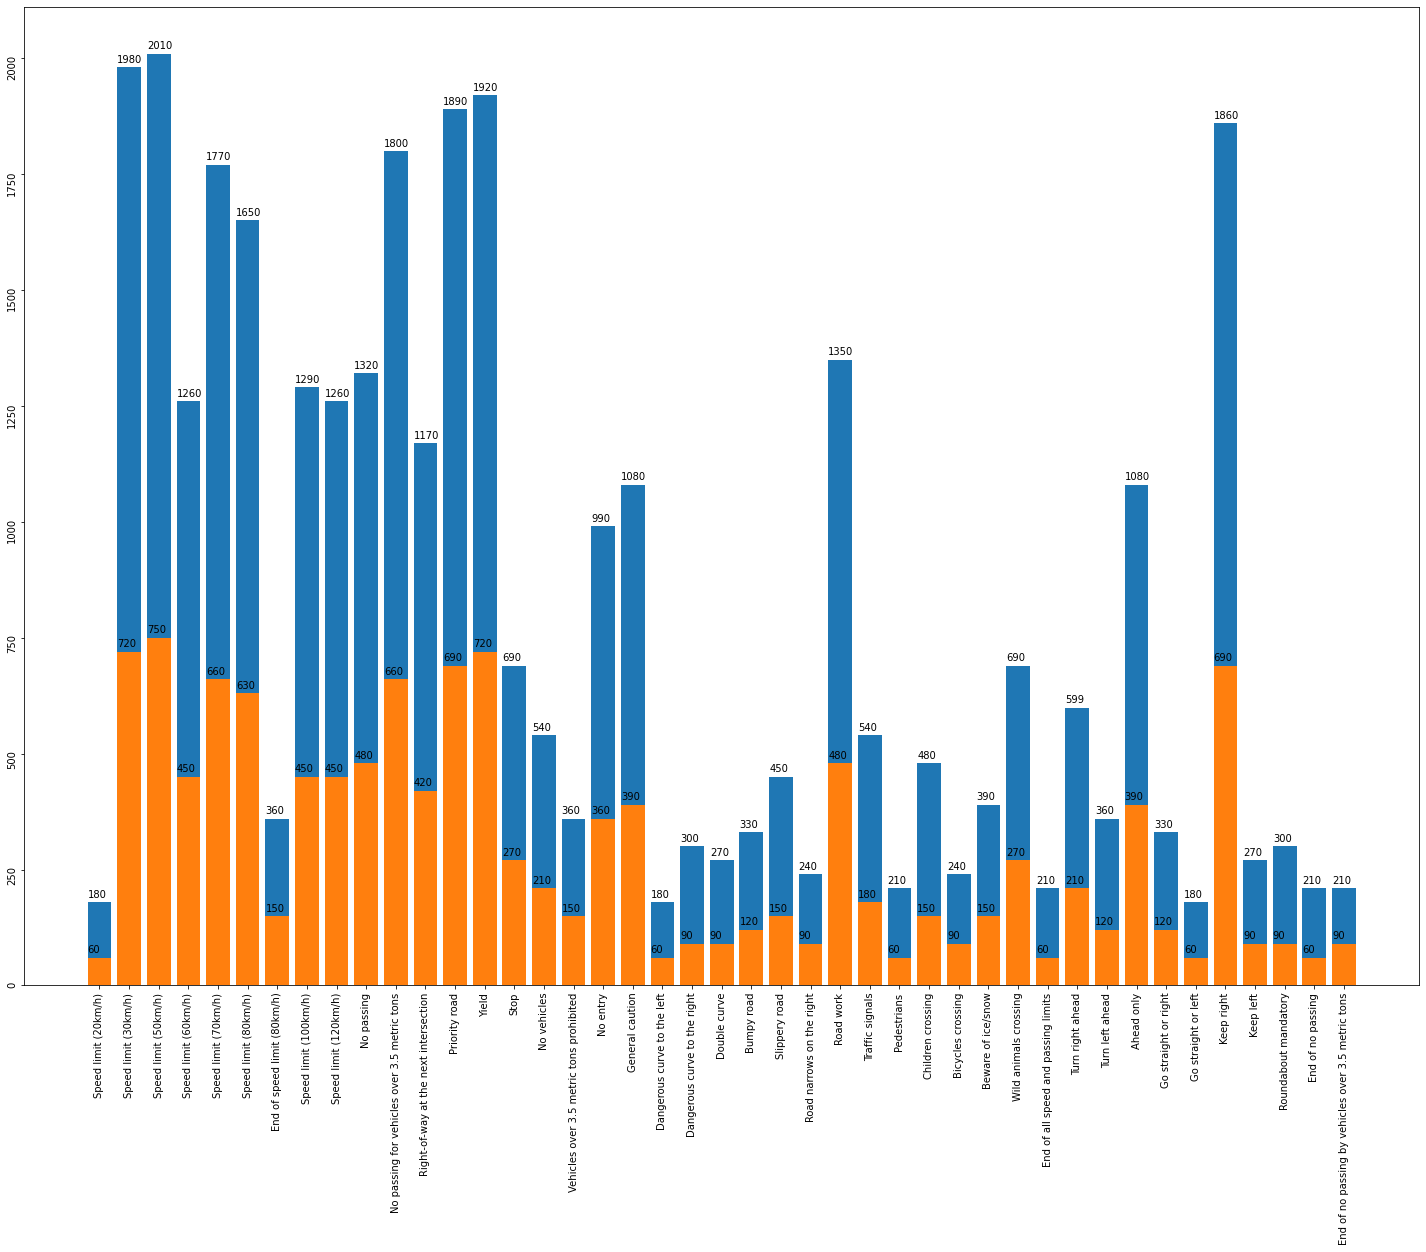

In [ ]:
(unq_test, cnt_test) = np.unique(test_data['labels'], return_counts=True)

fig, image = plt.subplots(figsize = (25, 18))
image.bar([index_label[x] for x in unique], counts)
image.bar([index_label[x] for x in unq_test], cnt_test)
image.tick_params(rotation = 90)
for i in image.patches:
    image.text(i.get_x(), i.get_height() + 10, str(i.get_height()))

In [ ]:
earlystopping = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=1)
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5",
                               monitor = 'val_accuracy',
                               verbose=1,
                               save_best_only=True)

In [ ]:
## Normalize the train, valid and test datasets to (-1,1)
trainX = trainX.astype('float32')
trainX = (trainX - 128.) / 128.
validX = validX.astype('float32')
validX = (validX - 128.) / 128.
testX  =  testX.astype('float32')
testX  = (testX  - 128.) / 128.

print(np.mean(trainX))
print(np.mean(validX))
print(np.mean(testX))

-0.35408133
-0.3472156
-0.35821554


In [ ]:
# Shuffle the training set and valid set.
trainX, trainY = shuffle(trainX, trainY)
validX, validY = shuffle(validX, validY)


In [ ]:
model1 = Sequential([
  layers.Conv2D(32, 5, padding='same', activation='relu'),
  layers.Conv2D(32, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(43)
])

In [ ]:
model1.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

In [ ]:
history = model1.fit(x = trainX,  y = trainY, validation_data = (validX, validY), epochs = 10, batch_size = 100)

Epoch 1/10
348/348 [==============================] - 337s 967ms/step - loss: 1.5554 - accuracy: 0.5671 - val_loss: 0.4966 - val_accuracy: 0.8628
Epoch 2/10
348/348 [==============================] - 337s 969ms/step - loss: 0.1261 - accuracy: 0.9615 - val_loss: 0.3548 - val_accuracy: 0.9109
Epoch 3/10
348/348 [==============================] - 334s 961ms/step - loss: 0.0436 - accuracy: 0.9872 - val_loss: 0.3621 - val_accuracy: 0.9383
Epoch 4/10
348/348 [==============================] - 336s 966ms/step - loss: 0.0355 - accuracy: 0.9890 - val_loss: 0.3109 - val_accuracy: 0.9544
Epoch 5/10
348/348 [==============================] - 336s 967ms/step - loss: 0.0252 - accuracy: 0.9928 - val_loss: 0.3275 - val_accuracy: 0.9494
Epoch 6/10
348/348 [==============================] - 335s 963ms/step - loss: 0.0238 - accuracy: 0.9928 - val_loss: 0.4568 - val_accuracy: 0.9537
Epoch 7/10
348/348 [==============================] - 336s 967ms/step - loss: 0.0299 - accuracy: 0.9917 - val_loss: 0.2735 -

In [ ]:
model1.evaluate(trainX, trainY)

1088/1088 [==============================] - 72s 66ms/step - loss: 0.0086 - accuracy: 0.9972


[0.008635355159640312, 0.9972125887870789]

In [ ]:
layer_names = []
for layer in model1.layers[1:14]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot

layer_names

['conv2d_7',
 'max_pooling2d_3',
 'conv2d_8',
 'conv2d_9',
 'max_pooling2d_4',
 'conv2d_10',
 'conv2d_11',
 'max_pooling2d_5',
 'dropout_1',
 'flatten_1',
 'dense_2',
 'dense_3']

In [ ]:
model1.save_weights("/content/drive/My Drive/CNN/traffic_weights.h5")
model1.save("/content/drive/My Drive/CNN/traffic_model.h5")

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 128)        

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('CACAPCACAP Training')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="best")
plt.show()

NameError: ignored

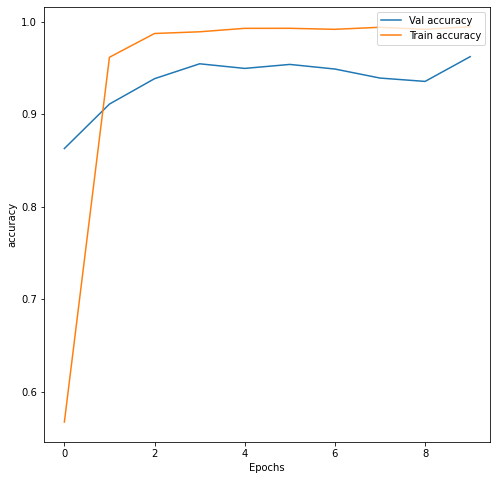

In [ ]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

plt.figure(figsize=(8,8))
plt.plot(val_accuracy)
plt.plot(accuracy)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='upper right')
plt.savefig( 'plot_accuracy.png')
plt.show()

In [ ]:
test_predict = model1.predict(testX)
index_test_predict = []
for i in range(len(test_predict)):
    index_test_predict.append(np.argmax(test_predict[i]))

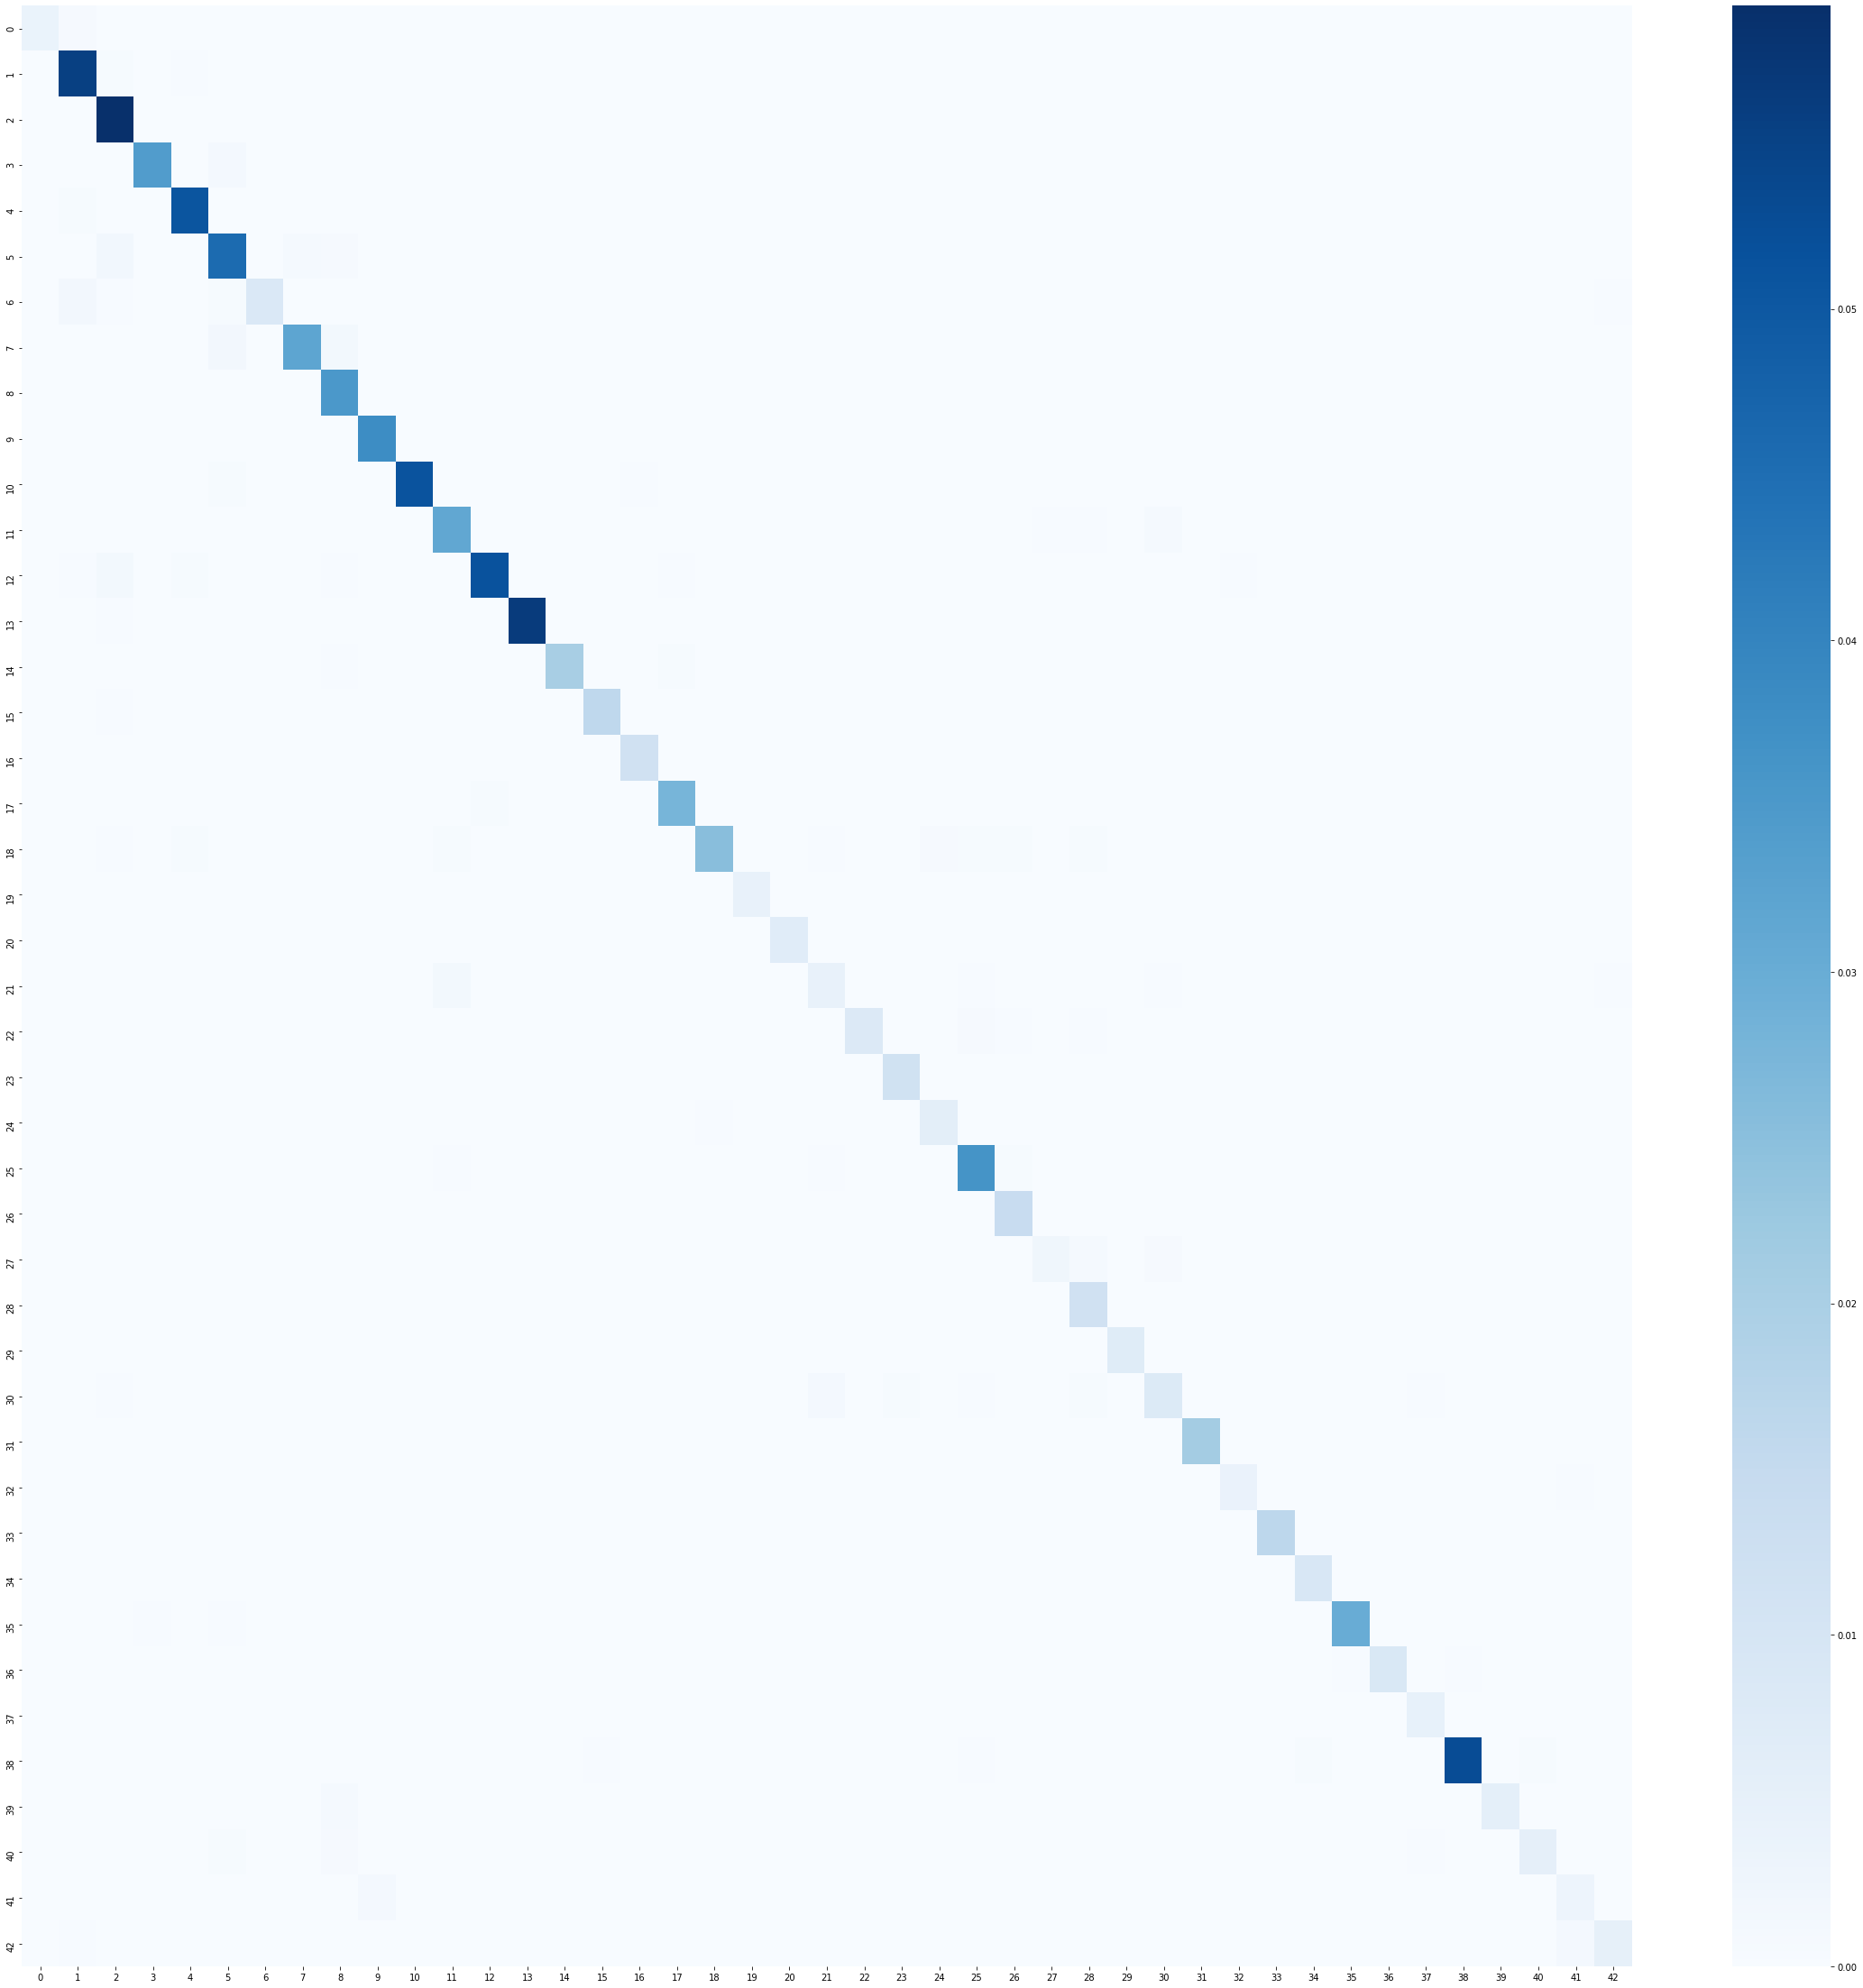

In [ ]:
cm = confusion_matrix(testY, index_test_predict)
fig, ax = plt.subplots(figsize = (40, 40))
sns.heatmap(cm/np.sum(cm), cmap='Blues')

In [ ]:
def convert_RGB_GRY(data, keepdims):
    input_rgb = data
    input_gry = np.sum(data/3, axis=3, keepdims=keepdims)
    return input_rgb, input_gry

X_train_rgb, X_train_gry = convert_RGB_GRY(trainX, keepdims=True)
X_valid_rgb, X_valid_gry = convert_RGB_GRY(validX, keepdims=True)
X_test_rgb, X_test_gry = convert_RGB_GRY(testX, keepdims=True)


In [ ]:

# Replace training, validation and testing variables with grayscale.
trainX = X_train_gry
validX = X_valid_gry
testX = X_test_gry


In [ ]:
print(np.mean(trainX))
print(np.mean(validX))
print(np.mean(testX))

-0.35408142
-0.34721553
-0.3582152


In [ ]:
# Shuffle the training set and valid set.
trainX, trainY = shuffle(trainX, trainY)
validX, validY = shuffle(validX, validY)

In [ ]:
model1 = Sequential([
  layers.Conv2D(32, 5, padding='same', activation='relu'),
  layers.Conv2D(32, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(43)
])

In [ ]:
model1.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

In [ ]:
history1 = model1.fit(x = trainX,  y = trainY, validation_data = (validX, validY), epochs = 10, batch_size = 100)

Epoch 1/10
348/348 [==============================] - 330s 948ms/step - loss: 1.4577 - accuracy: 0.6042 - val_loss: 0.3865 - val_accuracy: 0.8909
Epoch 2/10
348/348 [==============================] - 328s 943ms/step - loss: 0.1126 - accuracy: 0.9673 - val_loss: 0.2655 - val_accuracy: 0.9358
Epoch 3/10
348/348 [==============================] - 328s 943ms/step - loss: 0.0463 - accuracy: 0.9864 - val_loss: 0.2273 - val_accuracy: 0.9422
Epoch 4/10
348/348 [==============================] - 329s 944ms/step - loss: 0.0321 - accuracy: 0.9902 - val_loss: 0.2758 - val_accuracy: 0.9367
Epoch 5/10
348/348 [==============================] - 328s 944ms/step - loss: 0.0247 - accuracy: 0.9923 - val_loss: 0.2470 - val_accuracy: 0.9444
Epoch 6/10
348/348 [==============================] - 328s 943ms/step - loss: 0.0230 - accuracy: 0.9930 - val_loss: 0.1800 - val_accuracy: 0.9549
Epoch 7/10
348/348 [==============================] - 328s 943ms/step - loss: 0.0225 - accuracy: 0.9939 - val_loss: 0.1983 -

In [ ]:
model1.evaluate(trainX, trainY)

1088/1088 [==============================] - 72s 67ms/step - loss: 0.0101 - accuracy: 0.9973


[0.010089251212775707, 0.9972987771034241]

In [ ]:
model1.save_weights("/content/drive/My Drive/CNN/traffic_weights_gray.h5")
model1.save("/content/drive/My Drive/CNN/traffic_model_gray.h5")

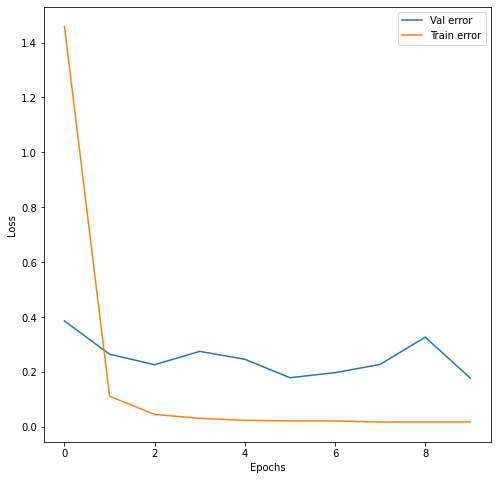

In [ ]:
val_loss = history1.history['val_loss']
loss = history1.history['loss']

plt.figure(figsize=(8,8))
plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error.png')
plt.show()

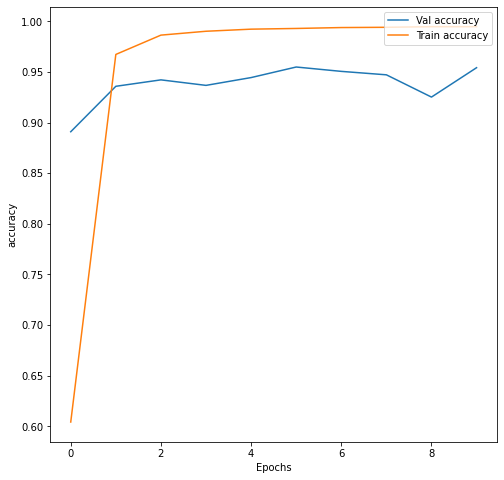

In [ ]:
val_accuracy = history1.history['val_accuracy']
accuracy = history1.history['accuracy']

plt.figure(figsize=(8,8))
plt.plot(val_accuracy)
plt.plot(accuracy)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='upper right')
plt.savefig( 'plot_accuracy.png')
plt.show()

layer : conv2d_24 , feature map shape : (1, 32, 32, 32)
nrow : 4 , ncol : 8


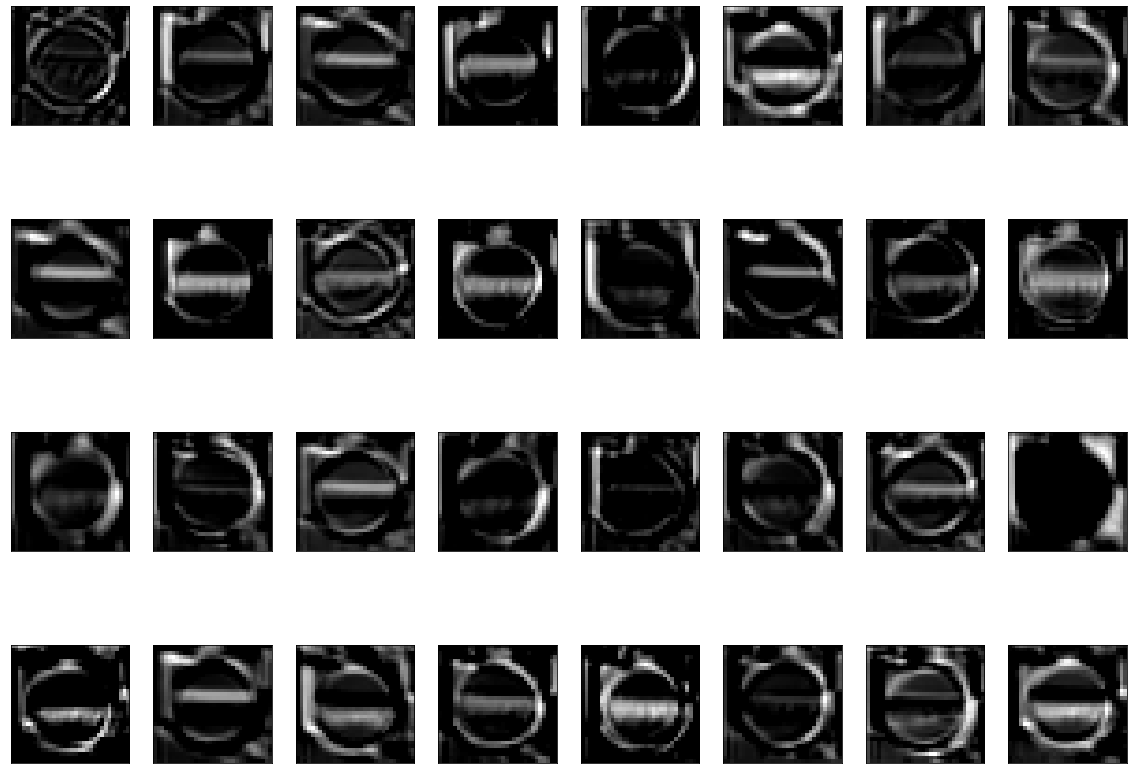

layer : conv2d_25 , feature map shape : (1, 32, 32, 32)
nrow : 4 , ncol : 8


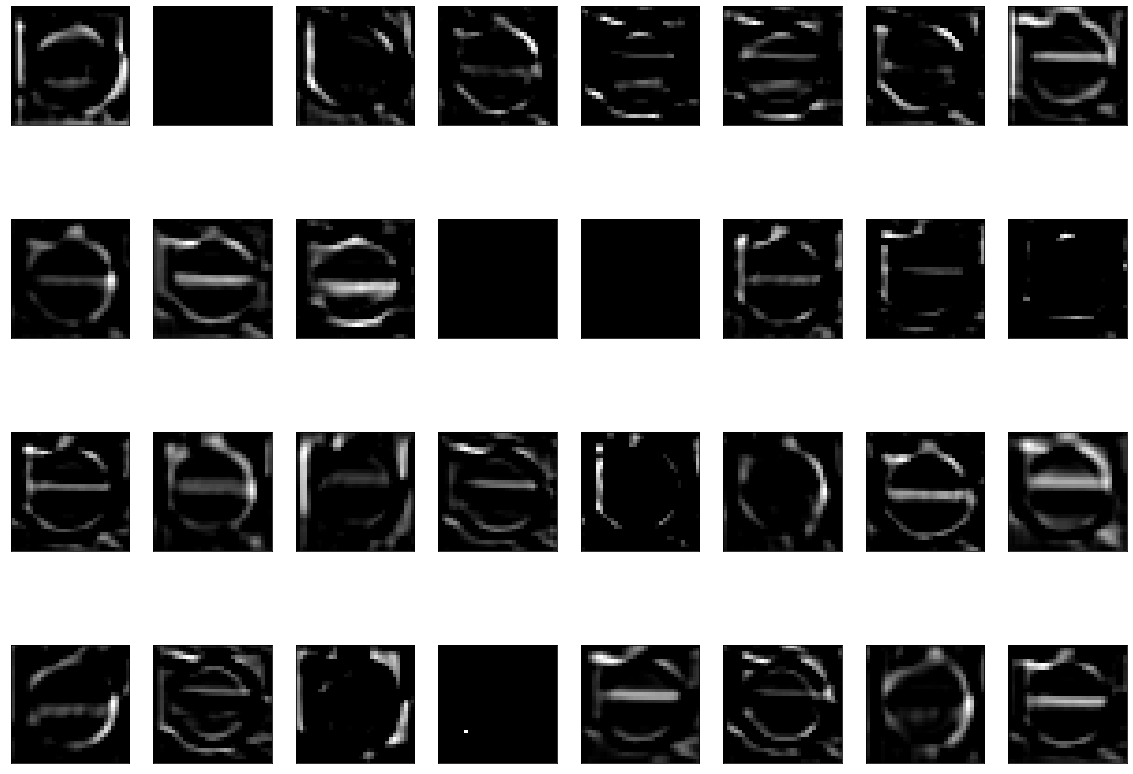

layer : max_pooling2d_12 , feature map shape : (1, 16, 16, 32)
nrow : 4 , ncol : 8


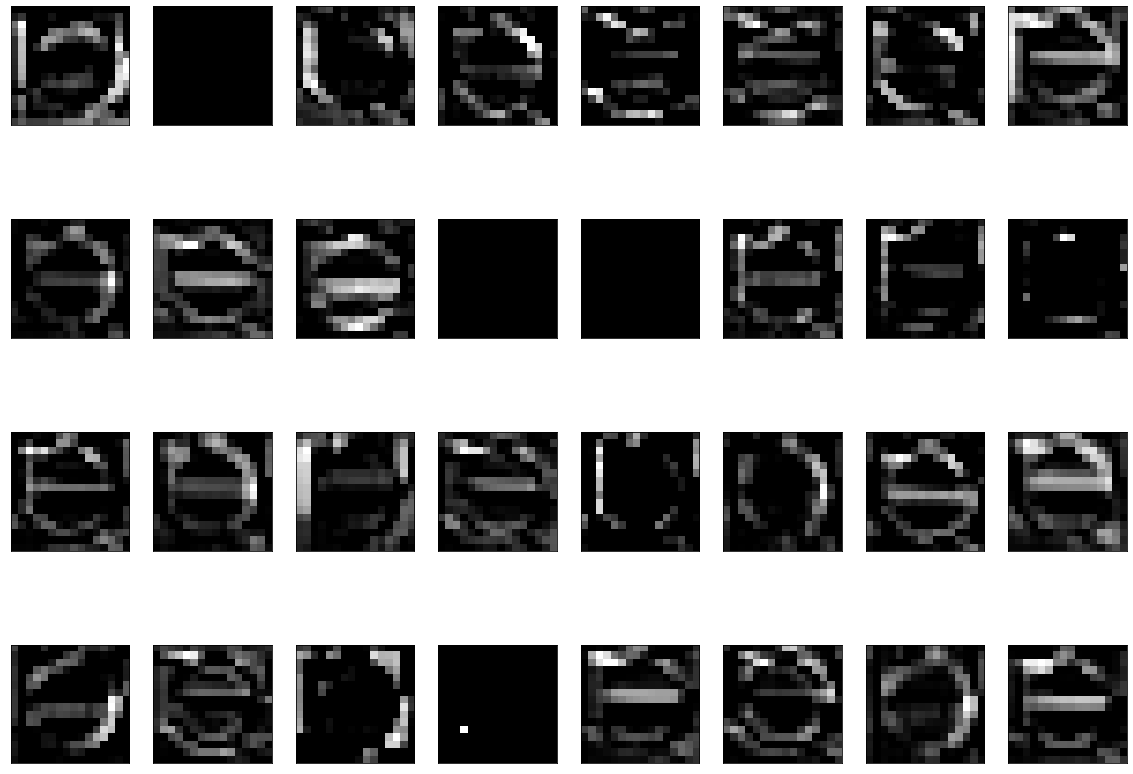

layer : conv2d_26 , feature map shape : (1, 16, 16, 64)
nrow : 8 , ncol : 8


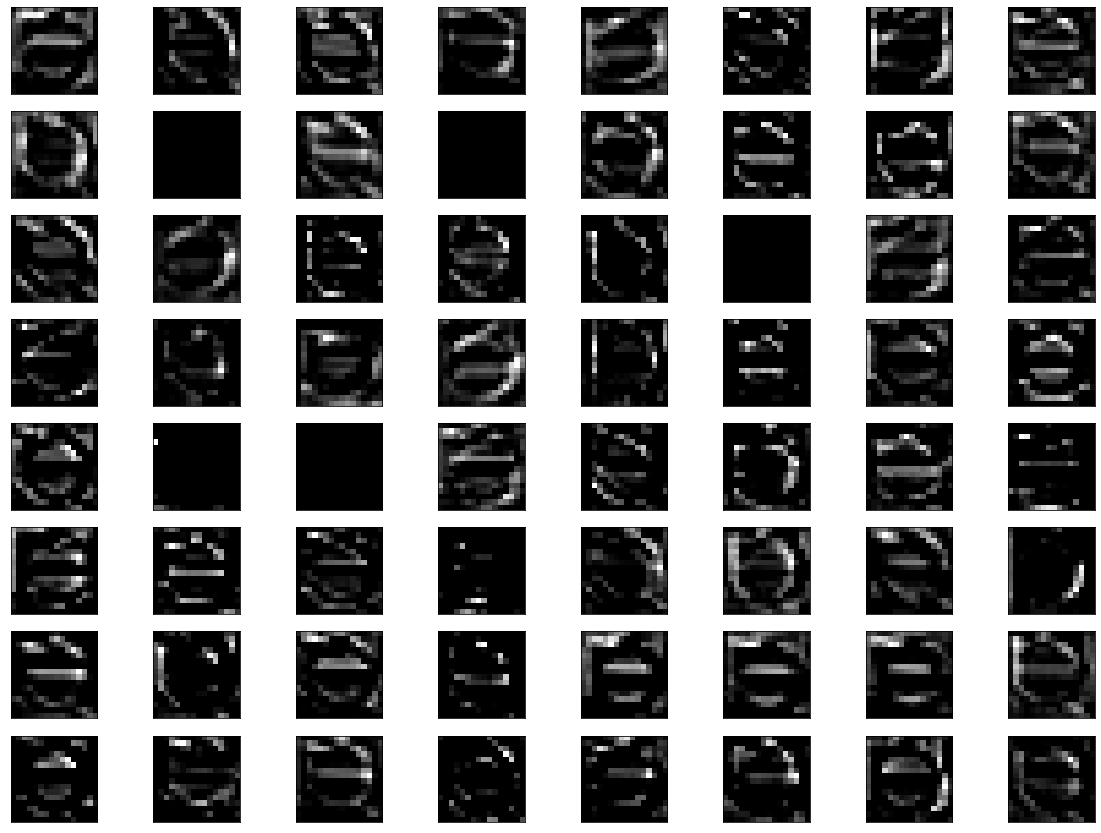

layer : conv2d_27 , feature map shape : (1, 16, 16, 64)
nrow : 8 , ncol : 8


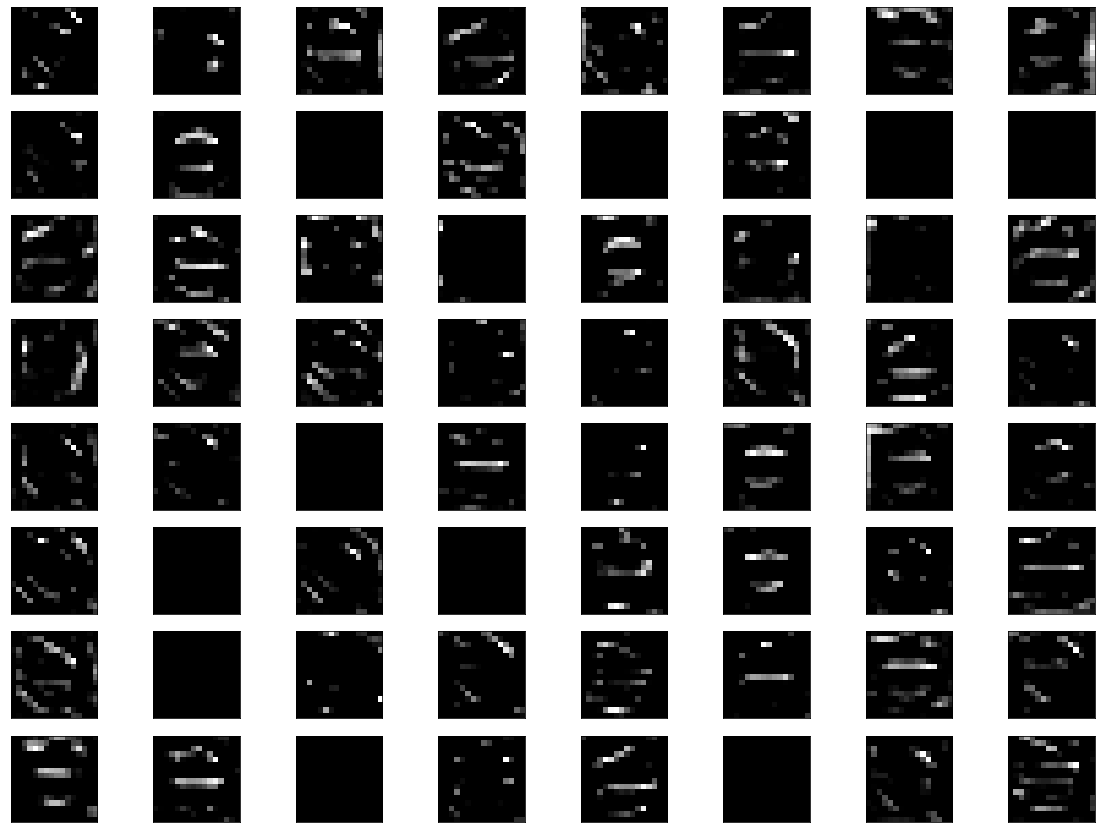

layer : max_pooling2d_13 , feature map shape : (1, 8, 8, 64)
nrow : 8 , ncol : 8


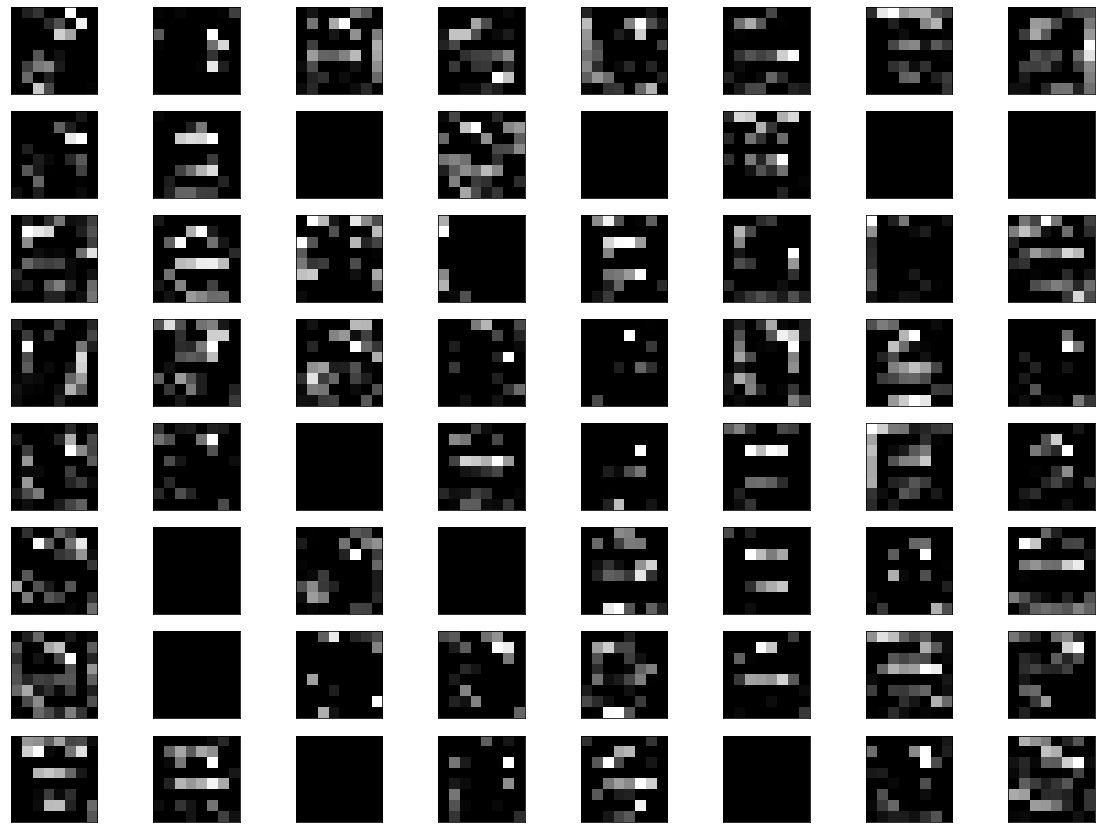

In [ ]:
num = choice(label_index[9])
for n_layer in range(6):
  model_layer = Model(inputs=model1.inputs, outputs=model1.layers[n_layer].output)
  feature_maps = model_layer.predict(trainX[1].reshape(1,32,32,1))
  print('layer : {} , feature map shape : {}'.format(model1.layers[n_layer].name,feature_maps.shape))

  n_row = int(feature_maps.shape[-1]/8)
  n_col = 8
  print('nrow : {} , ncol : {}'.format(n_row,n_col))
  plt.figure(figsize=(20,15))
  ix = 1

  for _ in range(n_row):
	  for _ in range(n_col):
		  ax = plt.subplot(n_row, n_col, ix)
		  ax.set_xticks([])
		  ax.set_yticks([])
		  plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		  ix += 1

  plt.show()

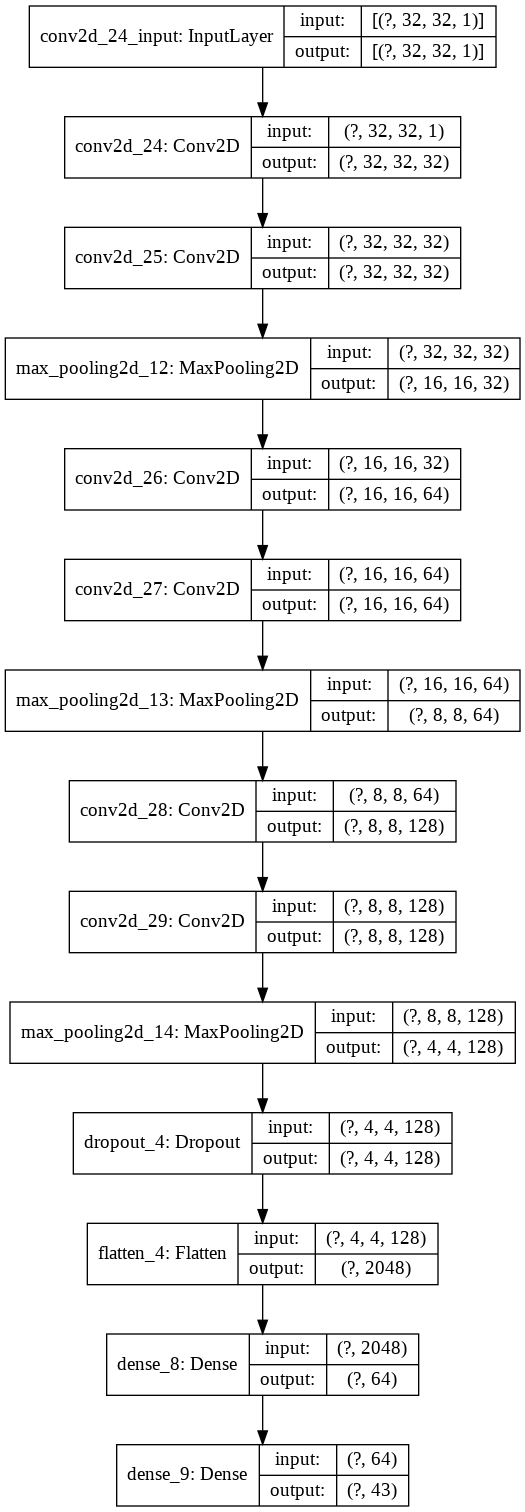

In [ ]:
dot_img_file = 'model1.png'
plot_model(model1, to_file=dot_img_file, show_shapes=True)